##Distribution of Peak Elevations in the Rocky Mountains versus the Alps

Over lunch we wondered why there are so many 14ers (mountains with peaks above 14,000 ft) but no 15ers in Colorado.  This seemed unlikely, and still holds true for the entire Rocky Mountain range.  


In [48]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


###Import Data from Wikipedia's list of peaks above 3,000 m

In [84]:
rpeaks = pd.read_csv('rockypeaks.csv')#,dtype={'Elevation':np.float32})
apeaks = pd.read_csv('alpspeaks.csv')

###Convert elevation to ft

In [179]:
m_to_ft = 3.28084

In [180]:
rpeaks["Elevationft"] = m_to_ft*rpeaks["Elevation"]
apeaks["Elevationft"] = m_to_ft*apeaks["Elevation"]



###Break Ties
There are a number of ties for peak elevation, especially in the Alps.

In [150]:
apeaks["Rank"] = arange(len(apeaks))+1
rpeaks["Rank"] = arange(len(rpeaks))+1

### The Rocky Mountain peaks have a minimum prominence of 500m.  The minimum for the Alps is much smaller.

In [238]:
apeaks["Prominence"].min()

170

In [239]:
hbins = arange(10000,16000,500)/1.e3

###Peak Elevation Distribution

Below we plot the elevation distribution of peaks with a minimum prominence of $500\,$m.

The Rocky Mountains are rather flat in the distribution.  This is likely due to erosion.  The Rockies are significantly older than the Alps.


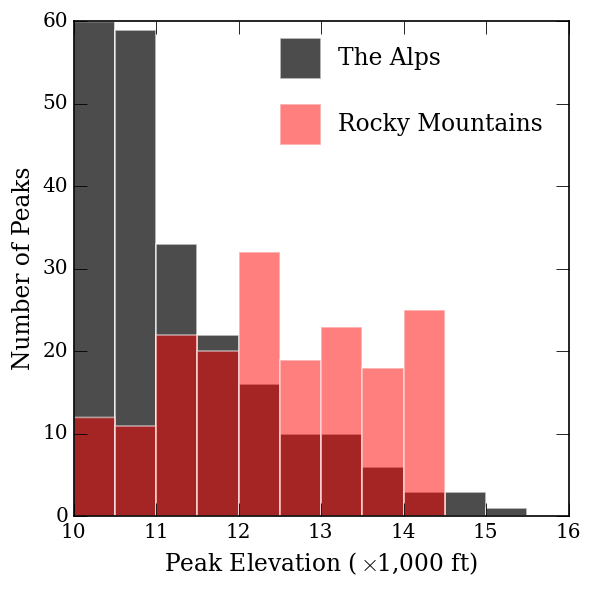

In [240]:
hist(apeaks["Elevationft"][apeaks["Prominence"]>500]/1.e3,bins=hbins,ec='w',color='k',alpha=.7)
hist(rpeaks["Elevationft"][rpeaks["Prominence"]>500]/1.e3,bins=hbins,ec='w',color='r',alpha=.5)
xlabel(r'Peak Elevation ($\times$1,000 ft)')
fill_between([12.5,13],[45,45],[50,50],edgecolor='w',color='r',alpha=.5)
text(13.2,47.5,r'Rocky Mountains',va='center')
fill_between([12.5,13],[53,53],[58,58],edgecolor='w',color='k',alpha=.7)
text(13.2,55.5,r'The Alps',va='center')

ylabel(r'Number of Peaks')
savefig('alps_v_rockies_peaks.png')

###Minimum Prominence

If we set a minimum prominence of 1028 m, which we choose so both the Alps and Rockies have the same number of peaks, we get a different picture.

In [241]:
print apeaks["Elevationft"][apeaks["Prominence"]>1028].size
print rpeaks["Elevationft"][rpeaks["Prominence"]>1028].size

57
57


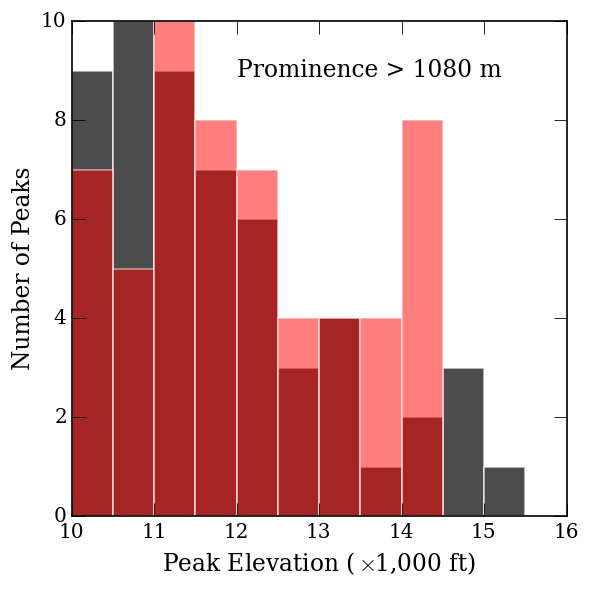

In [242]:
hist(apeaks["Elevationft"][apeaks["Prominence"]>1028]/1.e3,bins=hbins,ec='w',color='k',alpha=.7)
hist(rpeaks["Elevationft"][rpeaks["Prominence"]>1028]/1.e3,bins=hbins,ec='w',color='r',alpha=.5)
xlabel(r'Peak Elevation ($\times$1,000 ft)')
text(12,9,'Prominence > 1080 m',va='center')
ylabel(r'Number of Peaks')
savefig('min_prom_1028.png')

In [243]:
apeaks["Prominence"].max()*m_to_ft

15403.543799999999

In [244]:
rpeaks["Prominence"].max()*m_to_ft

9281.4963599999992

In [245]:
pbins = arange(2000,10000,500)/1000.

###Peak Prominence Distribution

Below we plot the prominence distribution of peaks.

Here, the distributions are much more similar to each other.  In this plot we don't show Mont Blanc, which has a prominence of 15,400 ft.



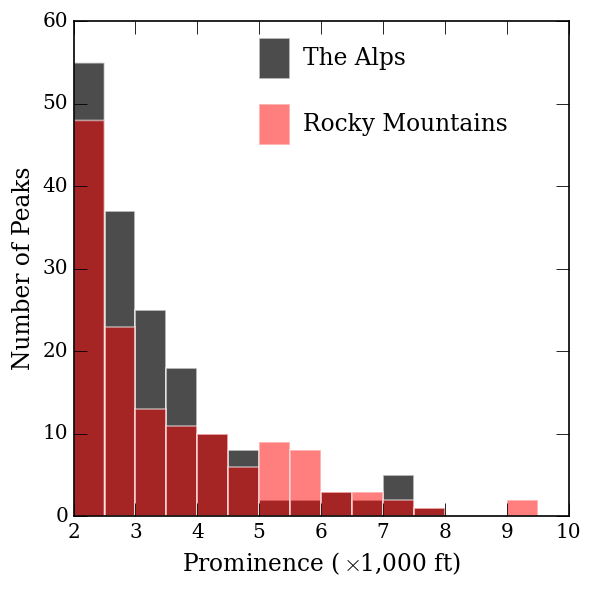

In [246]:
hist(apeaks["Prominence"]*m_to_ft/1.e3,bins=pbins,ec='w',color='k',alpha=.7)
hist(rpeaks["Prominence"]*m_to_ft/1.e3,bins=pbins,ec='w',color='r',alpha=.5)
xlabel(r'Prominence ($\times$1,000 ft)')
fill_between([5,5.5],[45,45],[50,50],edgecolor='w',color='r',alpha=.5)
text(5.7,47.5,r'Rocky Mountains',va='center')
fill_between([5,5.5],[53,53],[58,58],edgecolor='w',color='k',alpha=.7)
text(5.7,55.5,r'The Alps',va='center')
#text()
ylabel(r'Number of Peaks')
savefig('alps_v_rockies_proms.png')#

In [229]:
from scipy import stats

In [232]:
stats.ks_2samp(apeaks["Prominence"][apeaks["Prominence"]>500],rpeaks["Prominence"])

(0.10170807453416142, 0.22076696341299268)